# Homework Assignment 1 - Parametric Models and Gradient Descent
### **Due:** Thursday, Apr 20, 11:59pm
### Total: 100 points

## **1)** Deriving the Cross-entropy Cost (15 points)

Derive the binary cross-entropy cost for Logistic Regression, following a similar logic with the derivation of the MSE cost for Linear Regression. Note that:

- First assumption is that the target values - $y^{(i)}s$ - come from a Bernoulli distribution.
- Second assumption is that all the instances in the training dataset are independent.
- Based on the two assumptions, you need to write the likelihood and loglikelihood functions you need to maximize for a trained Logistic Regression model.

You can submit your derivation in any format, as long as it is legible. 

Step 1: 
- Assume that the binary cross entrophy is a bernoulli where P(y|x) is 1 if y = 1, and 0 if y = 0.
- logistic regression unknown probability function is modelled as P(y|x, w) = 1/1+e^(-(w^t)*x))

Step 2. 
- Assuming independence, which means we can equate several functions to each other, such as P(y|x) to an ultimate formula.
- Using the likelihood function L(w) = P(y_i|x_i ; w) multiplied together m times starting at i = 1, and i is 1, 2, 3... where w is the parameters that maximizes L(w)
- we then negative log both sides (-Log(L(w) = ...), to get P(y|x, w).
- By the fact P(0|x; w) = 1 - P(1|x; w), which means via exponentiation we can write that P(y|x; w) = P(1|x; w)^y x P(0|x; w)^1-y

Step 3.
- Plugging this expression back into negative log-likelihood, J(w) = (-1/m)/Sum of y_i*log(P(1|x_i, w) + (1 - y_i)log(1 - P(0|x_i, w)

## 2) Implementing Logistic Regression with Gradient Descent (60 points)

In this question, you need to implement a Logistic Regression model from scratch It should use the training dataset for the Gradient Descent algorithm and then, use the optimum parameters with the test data to return the performance.

**a)** Import all the libraries and tools you need below. **Note that you can use the helper functions and scalers of scikit-learn but you cannot use the models.** **(3 points)**

In [1]:
import os

os.getcwd()
os.chdir("C:\Data")
os.getcwd()

import pandas as pd
import numpy as np 
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC

**b)** Upload the **heart_disease_classification.csv** file. Split the features and the target column into different variables. **(3 points)**

In [2]:
data = pd.read_csv('heart_disease_classification.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = data.drop(columns = 'target')
Y = data['target']

**c)** Find the three columns that are categorical and non-binary. Create binary columns from them. **(4 points)**

In [4]:
X.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [5]:
X['cp'].max()

3

In [6]:
X['slope'].max()

2

In [7]:
X['restecg'].max()

2

In [8]:
X['ca'].max()

4

In [9]:
X['thal'].max()

3

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
for i in range(len(data)):
        if data['thal'].iloc[i] == 2 or 3 or 4:
            data['thal'][i] = 1

C:\Users\dylan\AppData\Local\Temp/ipykernel_17612/2855706988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['thal'][i] = 1


In [12]:
for i in range(len(data)):
        if data['ca'].iloc[i] == 2 or 3 or 4:
            data['ca'][i] = 1

C:\Users\dylan\AppData\Local\Temp/ipykernel_17612/254916671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ca'][i] = 1


In [13]:
for i in range(len(data)):
        if data['slope'].iloc[i] == 2 or 3 or 4:
            data['slope'][i] = 1

C:\Users\dylan\AppData\Local\Temp/ipykernel_17612/1777719670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['slope'][i] = 1


In [14]:
for i in range(len(data)):
        if data['restecg'].iloc[i] == 2 or 3 or 4:
            data['restecg'][i] = 1

C:\Users\dylan\AppData\Local\Temp/ipykernel_17612/1971443818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['restecg'][i] = 1


In [15]:
for i in range(len(data)):
        if data['cp'].iloc[i] == 2 or 3 or 4:
            data['cp'][i] = 1

C:\Users\dylan\AppData\Local\Temp/ipykernel_17612/3752776089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cp'][i] = 1


In [16]:
X = data.drop(columns = 'target')
Y = data['target']

X.max()

age          77.0
sex           1.0
cp            1.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       1.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         1.0
ca            1.0
thal          1.0
dtype: float64

**d)** Split the data into training and test datasets with a 80-20 split. Use **random_state=42**. Then, scale the features of both datasets. **(4 points)**

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, 
                                   random_state = 42)

**e)** Write the shorter helper functions first: **initialize** **(1 point)**, **predict** **(5 points)** and **sigmoid**. **(5 points)**

- **initialize** can be the same function you wrote in your in-class assignment.
- **predict** should be similar to the function you wrote in your in-class assignment as well. Here, however, it should take one more input, **threshold**. It should take the model parameters and the test data as other inputs and return class predictions using the Logistic Regression formula and the input threshold.
- **sigmoid** should take one input and return its sigmoid value, between 0 and 1. Note that you did not need this function for Linear Regression but you need to use it in multiple places for Logistic Regression.

**Make sure you use the numpy library tools for anything numeric, so that the helper functions work both for vectors and scalar values.**


In [50]:
def initialize(dimension):
    weights = np.full((dimension,),0.01)
    bias = 0.0
    return weights,bias

def sigmoid(z):
        sig = 1/(1+e**(-z))
        return sig
    
def predict(model_parameters, x_test, threshold):
    weights = model_parameters['weights']
    bias = model_parameters['bias']
    y_pred = sigmoid(np.dot(x_test, weights) + bias)
    return (y_pred >= threshold).astype(int)

**f)** Write the **calculate_cost_gradient** function. Note that it can be similar to the function you wrote for linear regression, however the cost and its gradients are different for logistic regression. You can keep the format of inputs and outputs the same. **(10 points)**

In [57]:
def calculate_cost_gradient(weights, bias, x_train, y_train):
        shape = x_train.shape[0]
        
        z = np.dot(x_train,weights)

        cost0 = sigmoid(z)
            
        #calculating gradient?
        bias = (1/shape) * np.sum(cost0-y_train)
        weight = (1/shape) * np.dot(x_train.T, cost0-y_train)
        cost = (-1 / shape) * np.sum(y_train * np.log(cost0) 
                                     + (1 - y_train) * np.log(1 - cost0))
        
        gradient = {'weight_gradient':weight, 'bias_gradient':bias}
        return cost,gradient

**g)** Write the **GradientDescent** function. **(10 points)** You can use the function for linear regression, however, for this assignment, you need to add one more input: **tol**. 
- This new input should be a tolerance value that should be compared with the difference between current and previous cost at every iteration. 
- If the difference is smaller than the tolerance, the iteration should stop and the parameters should not be updated anymore.
- If the maximum number of iterations is reached and the difference is still above the tolerance, the function should print a warning text.

In [58]:
def GradientDescent(weights,bias, x_train, y_train, learning_rate, iterations, tol):
    costList = []
    index = []
    
    for i in range(0, iterations):
        # For the given weights and bias, get the cost and the gradient...just call the calculate cost gradient
        # function from above
        cost = calculate_cost_gradient(weights, bias, 
                                       x_train, y_train)[0]
        gradient = calculate_cost_gradient(weights ,bias,
                                           x_train,y_train)[1]
        
        # update the weights and the bias
        weights = weights - (learning_rate * gradient['weight_gradient'])
        bias = bias - (learning_rate * gradient['bias_gradient'])
        
        costList.append(cost)
        index.append(i)
        
        if len(costList) >= 2:
            cost_diff = costList[i]-costList[i-1]
        
            if cost_diff < tol:
                break
                
        if i == iterations-1:
            print('WARNING MAX ITERATIONS REACHED')
    
    optimum_params = {'weights':weights, 'bias':bias}
    print('Total iterations:', i)
    print('Final MSE cost:', cost)
    
    plt.plot(index, costList)
    plt.xlabel('number of iterations')
    plt.ylabel('MSE cost')
    plt.show()
    
    return optimum_params

**h)** Lastly, using all the helper function above, write the **logistic_regression** function. **(10 points)**

- It should take eight inputs: **x_train**, **y_train**, **x_test**, **y_test**, **learning_rate**, **num_iterations**, **tol** and **threshold**. **threshold** should take a default value of 0.5.

- It should return one output: **optimum_parameters**

- It should print the test accuracy.

In [59]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations, tol, threshold=0.5):
    weights, bias = initialize(x_train.shape[1])
    optimum_params = GradientDescent(weights, bias, x_train, y_train, 
                                     learning_rate, num_iterations, tol)
    y_pred = predict(optimum_params, x_test, threshold)
    accuracy = accuracy_score(y_test, y_pred)

    print('Accuracy:', accuracy)

    return optimum_params

**i)** Run the **logistic_regression** function. Pick the **learning_rate**, **num_iterations** and **threshold** values you think are right, as long as the model converges. You can use the default threshold value of 0.5 Note that you can compare your results with the scikit-learn model with **penalty=None**. **(5 points)**

C:\Users\dylan\AppData\Local\Temp/ipykernel_17612/4034863568.py:7: RuntimeWarning: overflow encountered in power
  sig = 1/(1+e**(-z))
C:\Users\dylan\AppData\Local\Temp/ipykernel_17612/3653958108.py:11: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / shape) * np.sum(y_train * np.log(cost0)
C:\Users\dylan\AppData\Local\Temp/ipykernel_17612/3653958108.py:12: RuntimeWarning: divide by zero encountered in log
  + (1 - y_train) * np.log(1 - cost0))
C:\Users\dylan\AppData\Local\Temp/ipykernel_17612/888626284.py:21: RuntimeWarning: invalid value encountered in double_scalars
  cost_diff = costList[i]-costList[i-1]


WARNING MAX ITERATIONS REACHED
Total iterations: 999
Final MSE cost: inf


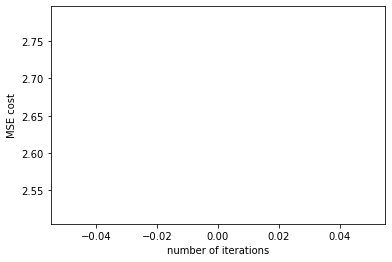

Accuracy: 0.5573770491803278


{'weights': array([-31.45018314,  -7.99519111,  -0.51337232, -31.37446526,
          1.79154505,   0.67606949,  -0.51337232,  53.77975435,
         -8.05349668, -19.4072177 ,  -0.51337232,  -0.51337232,
         -0.51337232]),
 'bias': -0.5233723227621006}

In [60]:
logistic_regression(x_train, y_train, x_test, 
                    y_test, 0.1, 1000, 0.000001, 0.5)

## 3) Adding Ridge Penalty (10 points)

You need to edit one of the helper functions above to introduce Ridge penalty to the implementation. Find that function, copy it below and add the necessary changes. Note that lambda needs to be an additional input to the function.

You don't have to run the new function with everything else above but it would be a good way to check if it is working. Note that if you do it, you need to change a few other things in the entire implementation, so copying everything to a new cell without altering your answer above is strongly suggested.

In [26]:
def calculate_cost_gradient(weights,bias,x_train,y_train, lamb):
    shape = x_train.shape[0]
    z = np.dot(x_train, weights) + bias
    cost0 = sigmoid(z)
    
    
    cost = (-1 / shape) * np.sum(y_train * np.log(cost0) 
                                 + (1 - y_train) * np.log(1 - cost0)) + (lamb / (2 * shape)) * np.sum(np.square(weights))
    #calculate the gradient
    bias = (1 / shape) * np.sum(cost0-y_train)
    weight = (1 / shape) * np.dot(x_train.T, cost0-y_train) 
        + (lambd / shape) * weights
    
    gradient = {'weight_gradient':weight, 'bias_gradient':bias}
    return cost, gradient

## **4)** Final Questions (15 points)

You may need to do some research for some of these questions.

**a)** What would be the problem with adding Lasso penalty instead of Ridge above? (Different software developers have different numerical solutions for this problem.)

**b)** Is there a model that includes both Ridge and Lasso penalty? What is it called? How many hyperparameters does it have?

**c)** If there are off-the-shelf scikit-learn models available, what is the point of implementing Linear/Logistic Regression and Gradient Descent from scratch?

**(5 points each)**

a. because lasso uses absolute value of estimated co-efficients via L1 regularization, which would not be compliant with the threshold introduced

b. Elastic-Net Regression and it contains 2 hyperparameters

c. because then it makes it customizable between the inputs. it also allwos one to delve into the mechanics and gears of the logistic regression.